In [1]:
import pandas as pd
from get_features import get_dataframes, get_labels
from decisionTree import make_decisionTree, get_acc
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# getting all data
labels = get_labels()
epys_features = get_dataframes()
full_dataframe = pd.merge(epys_features, labels, left_index=True, right_index=True)

X = full_dataframe.drop(labels.columns, axis=1)
Y = full_dataframe["dendrite_type"]
max_leaf_nodes = 4


c:\Users\lynnh\OneDrive\research\cell_classification\scripts\get_features.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe_labels['dendrite_type_number'] = le1.transform(filtered_dataframe_labels['dendrite_type'])
c:\Users\lynnh\OneDrive\research\cell_classification\scripts\get_features.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe_labels['structure_layer_name_number'] = le2.transform(filtered_dataframe_labels['structure_layer_name'])
c:\Users\lynnh\OneDrive\

In [2]:
# using random forest

# layer name labels accuracy
labelName = "processed_structure_layer_name"
Y = full_dataframe[labelName]
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.20, random_state=42)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_test_acc = rf_clf.score(X_test, y_test)
print(rf_test_acc)

rf_train_acc =rf_clf.score(X_train, y_train)
print(rf_train_acc)

# making confusion matrix for random forest on layer names
y_pred = rf_clf.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

"""
[[ 1  1  0  0  0]
 [ 0 25  5  5  1]
 [ 0  7 19  6  1]
 [ 0  5  3 22  3]
 [ 0  7  2  5  6]]

 the confusion matrix show that the model mixes up the labels for 6 and 4 often. It consistently
 gets labels 2/3 and 5 right. It has similar bias as the 12 node decision tree.
"""



0.6209677419354839
1.0
[[ 1  1  0  0  0]
 [ 0 28  3  5  0]
 [ 0  7 19  7  0]
 [ 0  5  2 24  2]
 [ 0  6  1  8  5]]


'\n[[ 1  1  0  0  0]\n [ 0 25  5  5  1]\n [ 0  7 19  6  1]\n [ 0  5  3 22  3]\n [ 0  7  2  5  6]]\n\n the confusion matrix show that the model mixes up the labels for 6 and 4 often. It consistently\n gets labels 2/3 and 5 right. It has similar bias as the 12 node decision tree.\n'

In [3]:
# structure area abbrev accuracy
labelName = "structure_area_abbrev"
Y = full_dataframe[labelName]
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.20, random_state=42)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_test_acc = rf_clf.score(X_test, y_test)
print(rf_test_acc)

rf_train_acc =rf_clf.score(X_train, y_train)
print(rf_train_acc)



0.7903225806451613
1.0


# answer
random forest differs from decision tree models in that they use multiple models to 
predict a result whereas a decision tree only uses 1. This reduces overfitting making
the random forest model more accurate.$\sigma$

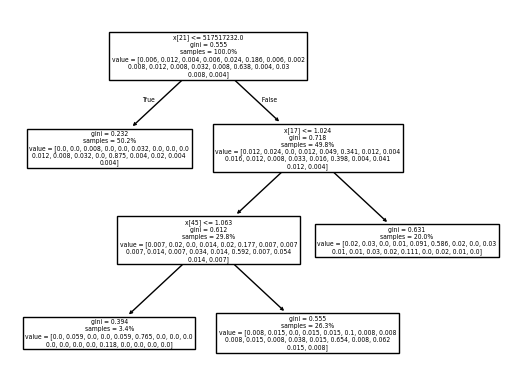

([0.6437246963562753,
  0.7388663967611336,
  0.7692307692307693,
  0.7813765182186235,
  0.7975708502024291,
  0.7975708502024291,
  0.8016194331983806,
  0.805668016194332,
  0.805668016194332,
  0.8076923076923077,
  0.8097165991902834,
  0.8117408906882592,
  0.8137651821862348,
  0.8137651821862348,
  0.8137651821862348,
  0.8137651821862348,
  0.8157894736842105,
  0.8157894736842105,
  0.8178137651821862,
  0.8178137651821862,
  0.8218623481781376,
  0.8299595141700404,
  0.8299595141700404],
 [0.7338709677419355,
  0.7903225806451613,
  0.7983870967741935,
  0.7983870967741935,
  0.8064516129032258,
  0.8064516129032258,
  0.8064516129032258,
  0.8064516129032258,
  0.8064516129032258,
  0.8064516129032258,
  0.8064516129032258,
  0.8064516129032258,
  0.8145161290322581,
  0.8145161290322581,
  0.8145161290322581,
  0.8064516129032258,
  0.8145161290322581,
  0.8145161290322581,
  0.8145161290322581,
  0.8145161290322581,
  0.8145161290322581,
  0.8145161290322581,
  0.8145161

In [4]:
from decisionTree import make_decisionTree, get_acc
from sklearn.tree import DecisionTreeClassifier
full_dataframe["merged_labels"] = full_dataframe["dendrite_type"] + "_" + full_dataframe["processed_structure_layer_name"]

X = full_dataframe.drop(labels.columns, axis=1)
X = X.drop(["id", "merged_labels"], axis = 1)
Y = full_dataframe["structure_area_abbrev"]
max_leaf_nodes = 4

make_decisionTree(X, Y, max_leaf_nodes)
list_nodes = np.arange(2, 25)
get_acc(X_train, y_train, X_test, y_test, list_nodes, "RandomForest")

In [5]:
var = 5
print(f"var")
print(f"{var}")
print(f"{var+5}")

var
5
10


In [6]:
colors = ["red", "blue", "green", "purple"]
dict = {"red":"red", "blue":"blue", "green":"green", "purple":"purple"}
for ind, color in enumerate(dict.keys()):
    print(f"{ind}: {color}")

0: red
1: blue
2: green
3: purple


aa 494
{'RandomForest': [0.4008097165991903, 0.4149797570850202, 0.4676113360323887, 0.5425101214574899, 0.5708502024291497, 0.6072874493927125, 0.6255060728744939, 0.645748987854251, 0.659919028340081, 0.6659919028340081, 0.6740890688259109, 0.6821862348178138, 0.7004048582995951, 0.7105263157894737, 0.7327935222672065, 0.7368421052631579, 0.7530364372469636, 0.757085020242915, 0.7631578947368421, 0.7732793522267206, 0.7753036437246964, 0.7834008097165992], 'DecisionTree': [0.2732793522267207, 0.35020242914979755, 0.38461538461538464, 0.4574898785425101, 0.47368421052631576, 0.520242914979757, 0.5384615384615384, 0.548582995951417, 0.5546558704453441, 0.562753036437247, 0.5668016194331984, 0.5748987854251012, 0.5850202429149798, 0.5951417004048583, 0.6032388663967612, 0.6133603238866396, 0.6255060728744939, 0.631578947368421, 0.6396761133603239, 0.645748987854251, 0.6477732793522267, 0.6538461538461539]} {'RandomForest': [0.33064516129032256, 0.3790322580645161, 0.4112903225806452, 0.

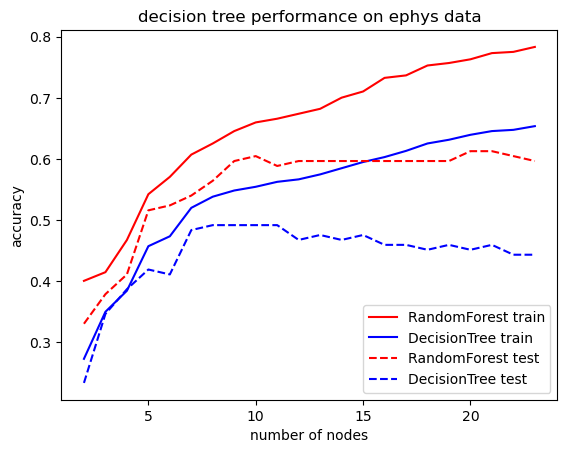

<Figure size 640x480 with 0 Axes>

In [7]:
from decisionTree import plot_acc
Y = full_dataframe["merged_labels"]
labelName = "merged_labels"
classifiers = ["RandomForest", "DecisionTree"]
max_nodes = 24
plot_acc(X, Y, labelName, classifiers, max_nodes)